# Assessing Health System Performance: 

# A Comparative Study of Chile, Costa Rica, and Panama

### By Amber Starke

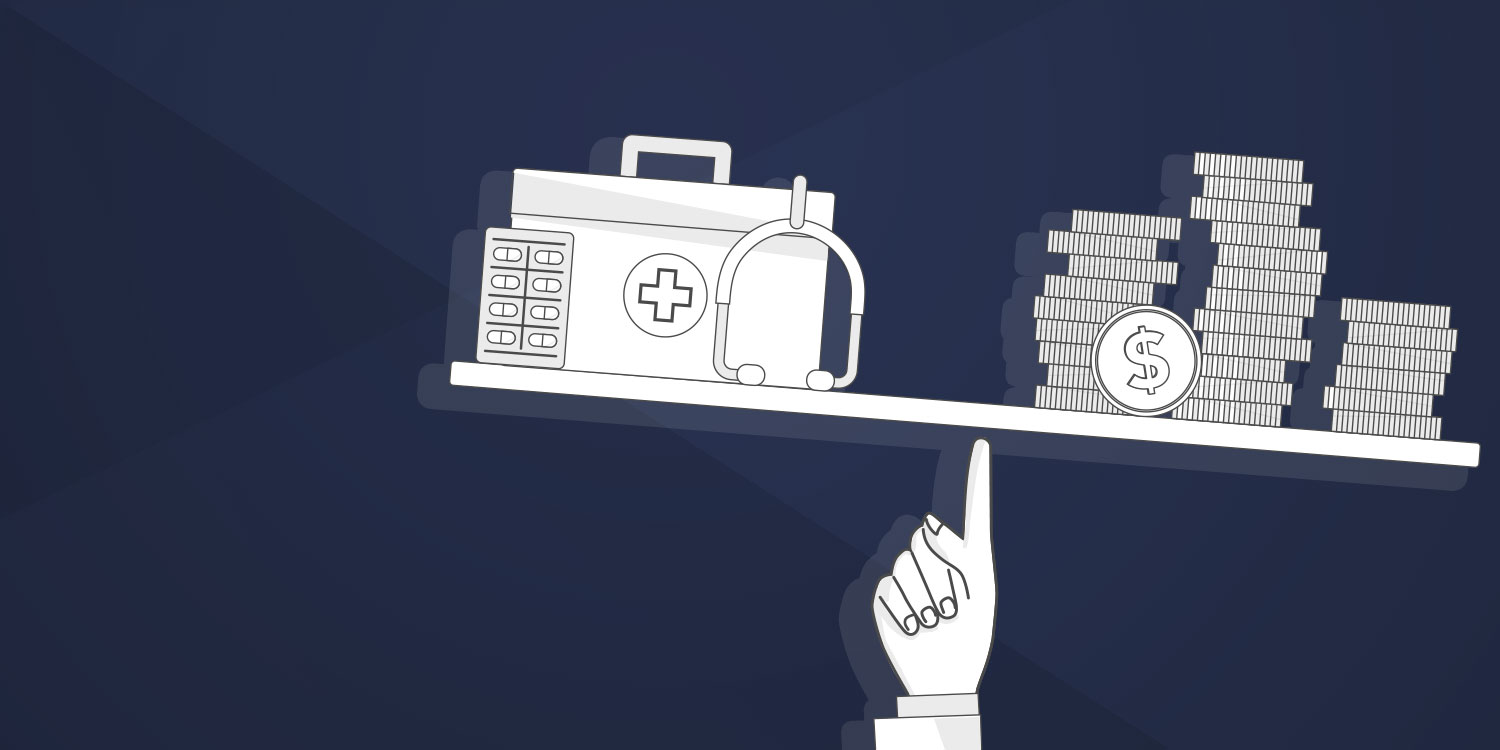

## Table of Contents

- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
- [Data Analysis and Visualization](#dav)
- [Conclusion](#conclusions)

<a id='intro'></a>
## Introduction 

For this project, I have decided to look at various economic indicators, healthcare quality indicators, and health outcomes using the Health Nutrition and Population Statistics data set on World Bank: https://databank.worldbank.org/source/health-nutrition-and-population-statistics.

In order to properly complete this project, I will be implementing the CRISP-DM method, as follows: 

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Evaluation
6. Deployment

## Business Understanding 

**1. Background**

I am examining health indicators across Chile, Costa Rica, and Panama using data from 2012 to 2019. The primary goal is to understand trends and potential future states of key health metrics in 3 Latin American nations with high HDI levels. 

This involves:

* Descriptive Analysis: Visualizing and understanding past trends in specific health indicators.

* Predictive Analysis: Forecasting future values of health indicators based on historical trends.

Human Development Index (As of 2022) according to https://countryeconomy.com/hdi: 
* Chile : 0.860
* Panama : 0.820
* Costa Rica : 0.06

**2. Business Objectives**

The main business-oriented objectives are to:

* Provide Insights: Offer clear, data-driven insights into the health status and trends of Chile, Costa Rica, and Panama.

* Inform Decision-Making: Equip policymakers, healthcare organizations, and international bodies with information to support evidence-based decisions related to public health interventions, resource allocation, and policy development.

* Enable Comparisons: Facilitate comparisons between the health indicators of the three countries, identify relative strengths and weaknesses, and learn from successful strategies.

* Identify Potential Problems: Highlight areas where health indicators are worsening or not improving sufficiently, signaling the need for targeted interventions.

* Support Planning: Use forecasts to anticipate future healthcare needs and plan accordingly.

**3. Business Questions**

Key questions that this project seeks to answer include:

* What are the key trends in health indicators in Chile, Costa Rica, and Panama between 2012 and 2019?

* How do these countries compare in terms of these health indicators?

* What are the projected future values for these health indicators in each country?

* What are the potential drivers behind observed trends in these indicators?

<a id='eda'></a>
## Exploratory Data Analysis

## Data Preparation

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in the data and take a first look
df = pd.read_csv('FinalDataProject1.csv')
df

,Series Name,Series Code,Country Name,Country Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Chile,CHL,14170,15080,14690,14080,13310,13200,14460,14690,12960,14790
1,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Panama,PAN,9870,10950,11520,12570,13180,14230,14910,15640,13070,14920
2,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Argentina,ARG,11770,12760,12240,12500,12130,13070,12390,11210,9040,10070
3,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Costa Rica,CRI,9330,9990,10410,10770,11170,11580,12070,12240,11700,12630
4,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,Chile,CHL,2.18,2.18,2.13,2.15,2.13,2.12,2.07,2.04,2.03,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# I can see that rows 56-60 will not be needed in the analysis.

# drop the unnecessary rows 
df = df.drop(df.index[56:61])

df

,Series Name,Series Code,Country Name,Country Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Chile,CHL,14170,15080,14690,14080,13310,13200,14460,14690,12960,14790
1,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Panama,PAN,9870,10950,11520,12570,13180,14230,14910,15640,13070,14920
2,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Argentina,ARG,11770,12760,12240,12500,12130,13070,12390,11210,9040,10070
3,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Costa Rica,CRI,9330,9990,10410,10770,11170,11580,12070,12240,11700,12630
4,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,Chile,CHL,2.18,2.18,2.13,2.15,2.13,2.12,2.07,2.04,2.03,1.97
5,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,Panama,PAN,2.13,2.13,2.05,2.09,2.06,2.15,1.96,1.94,1.92,..
6,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,Argentina,ARG,4.6,4.8,4.86,4.97,4.97,5.02,3.71,3.71,3.2,3.34
7,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,Costa Rica,CRI,1.18,1.16,1.15,1.15,1.14,1.13,1.11,1.09,1.15,1.18
8,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,Chile,CHL,1.753,1.887,2.036,2.159,2.31,2.455,2.595,2.649,2.808,2.973
9,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,Panama,PAN,1.605,1.588,..,1.581,1.574,1.59,1.61,1.638,1.629,..


In [4]:
# Assuming your DataFrame is named 'df'
df = df.replace('..', np.nan)

# Verify the replacement (optional)
print(df.isnull().sum()) # Check how many NaN values are now in each column

Series Name       0
Series Code       0
Country Name      0
Country Code      0
2012 [YR2012]     3
2013 [YR2013]     2
2014 [YR2014]     4
2015 [YR2015]     2
2016 [YR2016]     2
2017 [YR2017]     2
2018 [YR2018]     3
2019 [YR2019]     2
2020 [YR2020]     9
2021 [YR2021]    17
dtype: int64


In [5]:
# Clearly, 2021 and 2020 do not have enough data to be useful, so I will drop these columns, along with other unnecessary columns.

# drop unnecessary columns
print(df.columns)
df = df.drop(['Series Code','Country Code', '2020 [YR2020]', '2021 [YR2021]'], axis=1)

# I only want to look at three countries. Looking at data availability, I can see that Argentina is the least available, so I will use the other three countries. 
df = df[df['Country Name'].isin(['Chile', 'Costa Rica', 'Panama'])]

df

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]'],
      dtype='object')


,Series Name,Country Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,"GNI per capita, Atlas method (current US$)",Chile,14170,15080,14690,14080,13310,13200,14460,14690
1,"GNI per capita, Atlas method (current US$)",Panama,9870,10950,11520,12570,13180,14230,14910,15640
3,"GNI per capita, Atlas method (current US$)",Costa Rica,9330,9990,10410,10770,11170,11580,12070,12240
4,"Hospital beds (per 1,000 people)",Chile,2.18,2.18,2.13,2.15,2.13,2.12,2.07,2.04
5,"Hospital beds (per 1,000 people)",Panama,2.13,2.13,2.05,2.09,2.06,2.15,1.96,1.94
7,"Hospital beds (per 1,000 people)",Costa Rica,1.18,1.16,1.15,1.15,1.14,1.13,1.11,1.09
8,"Physicians (per 1,000 people)",Chile,1.753,1.887,2.036,2.159,2.31,2.455,2.595,2.649
9,"Physicians (per 1,000 people)",Panama,1.605,1.588,NaN,1.581,1.574,1.59,1.61,1.638
11,"Physicians (per 1,000 people)",Costa Rica,2.433,2.516,2.617,2.705,2.881,2.999,2.87,3.208
12,Current health expenditure (% of GDP),Chile,7.01951313,7.47552633,7.84150124,8.3513937,8.55767059,9.090518,9.22575188,9.36262131


In [6]:
print(df.isnull().sum())

Series Name      0
Country Name     0
2012 [YR2012]    1
2013 [YR2013]    1
2014 [YR2014]    2
2015 [YR2015]    1
2016 [YR2016]    1
2017 [YR2017]    1
2018 [YR2018]    1
2019 [YR2019]    1
dtype: int64


In [7]:
# Panama contains no information on drinking water, so I will drop this column.

# Panama is missing information in 2014 on physicians per 1000 people, so I will deal with this below using linear interpolation.

In [8]:
physicians_data = [1.605, 1.588, 'NaN', 1.581, 1.574, 1.59, 1.61, 1.638]

# Replace 'NaN' string with actual np.nan value
physicians_data = [np.nan if x == 'NaN' else x for x in physicians_data]

# Convert to a NumPy array for easier handling
physicians_data = np.array(physicians_data, dtype=float)

# Impute the missing value using linear interpolation
nans, index = np.isnan(physicians_data), lambda z: z.nonzero()[0]
physicians_data[nans] = np.interp(index(nans), index(~nans), physicians_data[~nans])

print(physicians_data)

[1.605  1.588  1.5845 1.581  1.574  1.59   1.61   1.638 ]


In [9]:
# So, I will set my 'NaN' value to 1.5845 when I separate the Panama df.

# Separate the large dataframe into three separate ones by country and reshape the dataframes.

In [10]:
# exclude mortality from CVD, cancer, diabetes, as I am more interested in infant mortality rates and under 5 mortality rates, 
# and excldue or CRD & Drinking Water statistics due to lack of data.
    
panama_df = df[df['Country Name'] == 'Panama']

panama_df = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'GNI per capita (USD)': [9870,10950,11520,12570,13180,14230,14910,15640],
    'Hospital beds': [2.13,2.13,2.05,2.09,2.06,2.15,1.96,1.94],
    # set to 1.5845 instead of NaN
    'Physicians': [1.605,1.588,1.5845,1.581,1.574,1.59,1.61,1.638],
    'Health expenditure (% GDP)': [6.74132681,6.75967455,7.16729832,7.18962574,7.35213518,7.42582321,7.87820292,8.46795654],
    'Health expenditure per capita': [725.86376953,806.58551025,920.07659912,982.79394531,1057.40661621,1127.68896484,1228.07336426,1340.13781738],
    'Out-of-pocket expenditure': [34.78495407,32.27741623,31.79924011,33.03644562,32.69819641,31.91596031,35.70438766,37.61917496],
    'Life expectancy': [76.819,77.038,77.248,77.468,77.653,77.795,77.863,77.81],
    'Infant mortality rate': [15.2,15,14.9,14.8,14.7,14.5,14.2,13.6],
    'Under 5 mortality rate': [17.7,17.5,17.3,17.2,17.1,16.9,16.5,15.8],
    'Percent of births attended by skilled health staff': [94.3,91.4,93.9,96.3,94.6,94.2,92.9,95],
    'Maternal mortality ratio': [53,52,50,49,49,49,47,51],
    'Immunization measles (% children 12-23mo)': [98,92,90,93,95,98,98,97]
    
})

panama_df

,Year,GNI per capita (USD),Hospital beds,Physicians,Health expenditure (% GDP),Health expenditure per capita,Out-of-pocket expenditure,Life expectancy,Infant mortality rate,Under 5 mortality rate,Percent of births attended by skilled health staff,Maternal mortality ratio,Immunization measles (% children 12-23mo)
0,2012,9870,2.13,1.6050,6.741327,725.863770,34.784954,76.819,15.2,17.7,94.3,53,98
1,2013,10950,2.13,1.5880,6.759675,806.585510,32.277416,77.038,15.0,17.5,91.4,52,92
2,2014,11520,2.05,1.5845,7.167298,920.076599,31.799240,77.248,14.9,17.3,93.9,50,90
3,2015,12570,2.09,1.5810,7.189626,982.793945,33.036446,77.468,14.8,17.2,96.3,49,93
4,2016,13180,2.06,1.5740,7.352135,1057.406616,32.698196,77.653,14.7,17.1,94.6,49,95
5,2017,14230,2.15,1.5900,7.425823,1127.688965,31.915960,77.795,14.5,16.9,94.2,49,98
6,2018,14910,1.96,1.6100,7.878203,1228.073364,35.704388,77.863,14.2,16.5,92.9,47,98
7,2019,15640,1.94,1.6380,8.467957,1340.137817,37.619175,77.810,13.6,15.8,95.0,51,97


In [11]:
chile_df = df[df['Country Name'] == 'Chile']

chile_df = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'GNI per capita (USD)': [14170,15080,14690,14080,13310,13200,14460,14690],
    'Hospital beds': [2.18, 2.18, 2.13, 2.15, 2.13, 2.12, 2.07, 2.04],
    'Physicians': [1.753, 1.887, 2.036, 2.159, 2.31, 2.455, 2.595, 2.649],
    'Health expenditure (% GDP)': [7.019513, 7.475526, 7.841501, 8.351394, 8.557671, 9.090518, 9.225752, 9.362621],
    'Health expenditure per capita': [1081.460693, 1183.620850, 1150.061646, 1133.279785, 1179.733643, 1367.716431, 1457.272827, 1369.484009],
    'Out-of-pocket expenditure': [33.407642, 33.638309, 34.268730, 34.509254, 34.750828, 33.305096, 33.246727, 32.800030],
    'Life expectancy': [79.023, 79.339, 79.473, 79.746, 80.079, 80.350, 80.133, 80.326],
    'Infant mortality rate': [7.2, 7.1, 7.0, 6.8, 6.7, 6.6, 6.4, 6.2],
    'Under 5 mortality rate': [8.4,8.2,8.1,8,7.8,7.6,7.4,7.1],
    'Percent of births attended by skilled health staff': [99.8,99.8,99.8,99.7,99.7,99.8,99.8,99.8],
    'Maternal mortality ratio': [19,18,16,16,15,15,15,15],
    'Immunization measles (% children 12-23mo)': [90,90,97,96,93,93,93,95]
})  
        

chile_df    

,Year,GNI per capita (USD),Hospital beds,Physicians,Health expenditure (% GDP),Health expenditure per capita,Out-of-pocket expenditure,Life expectancy,Infant mortality rate,Under 5 mortality rate,Percent of births attended by skilled health staff,Maternal mortality ratio,Immunization measles (% children 12-23mo)
0,2012,14170,2.18,1.753,7.019513,1081.460693,33.407642,79.023,7.2,8.4,99.8,19,90
1,2013,15080,2.18,1.887,7.475526,1183.620850,33.638309,79.339,7.1,8.2,99.8,18,90
2,2014,14690,2.13,2.036,7.841501,1150.061646,34.268730,79.473,7.0,8.1,99.8,16,97
3,2015,14080,2.15,2.159,8.351394,1133.279785,34.509254,79.746,6.8,8.0,99.7,16,96
4,2016,13310,2.13,2.310,8.557671,1179.733643,34.750828,80.079,6.7,7.8,99.7,15,93
5,2017,13200,2.12,2.455,9.090518,1367.716431,33.305096,80.350,6.6,7.6,99.8,15,93
6,2018,14460,2.07,2.595,9.225752,1457.272827,33.246727,80.133,6.4,7.4,99.8,15,93
7,2019,14690,2.04,2.649,9.362621,1369.484009,32.800030,80.326,6.2,7.1,99.8,15,95


In [12]:
costarica_df = df[df['Country Name'] == 'Chile']

costarica_df = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'GNI per capita (USD)': [9330,9990,10410,10770,11170,11580,12070,12240],
    'Hospital beds': [1.18,1.16,1.15,1.15,1.14,1.13,1.11,1.09],
    'Physicians': [2.433,2.516,2.617,2.705,2.881,2.999,2.87,3.208],
    'Health expenditure (% GDP)': [7.78642321,7.68229342,7.66376162,7.59196234,7.31724358,7.04522991,7.28587723,7.22124958],
    'Health expenditure per capita': [776.43487549,816.87872314,822.91003418,875.34973145,870.73840332,853.75048828,902.22119141,914.88470459],
    'Out-of-pocket expenditure': [24.5027504,23.22566605,24.41330528,22.59923172,22.20295334,21.25539017,22.4164257,22.32456398],
    'Life expectancy': [79.283,79.403,78.774,79.086,79.459,79.377,79.484,79.427],
    'Infant mortality rate': [8.6,8.2,7.9,7.7,7.6,7.5,7.3,7.2],
    'Under 5 mortality rate': [9.9,9.6,9.3,9,8.8,8.6,8.5,8.3],
    'Percent of births attended by skilled health staff': [98.9,99,99.2,90,98.8,98.7,98.5,99],
    'Maternal mortality ratio': [24,23,24,20,19,19,18,19],
    'Immunization measles (% children 12-23mo)': [90,91,95,93,93,96,94,95]
})  
        

costarica_df 

,Year,GNI per capita (USD),Hospital beds,Physicians,Health expenditure (% GDP),Health expenditure per capita,Out-of-pocket expenditure,Life expectancy,Infant mortality rate,Under 5 mortality rate,Percent of births attended by skilled health staff,Maternal mortality ratio,Immunization measles (% children 12-23mo)
0,2012,9330,1.18,2.433,7.786423,776.434875,24.502750,79.283,8.6,9.9,98.9,24,90
1,2013,9990,1.16,2.516,7.682293,816.878723,23.225666,79.403,8.2,9.6,99.0,23,91
2,2014,10410,1.15,2.617,7.663762,822.910034,24.413305,78.774,7.9,9.3,99.2,24,95
3,2015,10770,1.15,2.705,7.591962,875.349731,22.599232,79.086,7.7,9.0,90.0,20,93
4,2016,11170,1.14,2.881,7.317244,870.738403,22.202953,79.459,7.6,8.8,98.8,19,93
5,2017,11580,1.13,2.999,7.045230,853.750488,21.255390,79.377,7.5,8.6,98.7,19,96
6,2018,12070,1.11,2.870,7.285877,902.221191,22.416426,79.484,7.3,8.5,98.5,18,94
7,2019,12240,1.09,3.208,7.221250,914.884705,22.324564,79.427,7.2,8.3,99.0,19,95


In [13]:
# Check for nulls in these new dataframes: 

print("\nPanama:")
print(panama_df.isnull().sum())


print("\nChile:")
print(chile_df.isnull().sum())

print("\nCosta Rica:")
print(costarica_df.isnull().sum())


Panama:
Year                                                  0
GNI per capita (USD)                                  0
Hospital beds                                         0
Physicians                                            0
Health expenditure (% GDP)                            0
Health expenditure per capita                         0
Out-of-pocket expenditure                             0
Life expectancy                                       0
Infant mortality rate                                 0
Under 5 mortality rate                                0
Percent of births attended by skilled health staff    0
Maternal mortality ratio                              0
Immunization measles (% children 12-23mo)             0
dtype: int64

Chile:
Year                                                  0
GNI per capita (USD)                                  0
Hospital beds                                         0
Physicians                                            0
Health expenditure

## Data Assessment

*   **Year**: Represents the calendar year for which the data is recorded. In your dataset, it ranges from 2012 to 2019. It serves as the time dimension for tracking changes and trends in health indicators.
*   **GNI per capita**: Gross National Income per capita, measured in current US dollars using the Atlas method. It represents the average income of a country's residents. A higher GNI per capita generally indicates a more prosperous economy, which can correlate with better access to healthcare and improved living conditions.
*   **Hospital beds (per 1,000 people)**: Indicates the number of hospital beds available for every 1,000 residents in a country. This is a measure of the capacity of the healthcare system to provide inpatient care. A higher number suggests better access to hospital services.
*   **Physicians (per 1,000 people)**: Represents the number of medical doctors available for every 1,000 residents. This is an indicator of the availability of medical professionals and access to healthcare services. A higher number typically suggests better access to medical consultations and treatment.
*   **Health expenditure (% GDP)**: The percentage of a country's Gross Domestic Product (GDP) that is spent on health-related activities. This reflects the priority a country places on healthcare and the resources allocated to it. A higher percentage may indicate a greater investment in the health system.
*   **Health expenditure per capita**: The amount of money spent on health-related activities per person in a country, measured in current US dollars. This provides a sense of the resources available for each individual's healthcare needs.
*   **Out-of-pocket expenditure**: The percentage of total health expenditure that is paid directly by individuals at the point of receiving healthcare services. This indicates the financial burden on individuals for healthcare costs. A lower percentage suggests greater coverage by insurance or government programs.
*   **Life expectancy**: The average number of years a newborn infant would live if prevailing patterns of mortality at the time of birth were to stay the same throughout their life. It is a key indicator of overall health and well-being in a population.
*   **Infant mortality rate**: The number of deaths of infants under one year old per 1,000 live births. It is a sensitive indicator of the overall health and well-being of a population, reflecting factors such as access to prenatal care, nutrition, and sanitation.
*   **Under 5 mortality rate**: The number of deaths of children under five years old per 1,000 live births. Like infant mortality, it reflects a population's overall health, encompassing factors like nutrition, access to healthcare, sanitation, and disease prevention. It is considered a key indicator of child well-being.
*   **Births attended by skilled health staff**: The percentage of live births that are attended by skilled health personnel (e.g., doctors, nurses, midwives) trained to manage normal deliveries and provide emergency obstetric care. This measures the availability and utilization of professional maternal healthcare services, which are crucial for reducing maternal and neonatal mortality.
*   **Maternal mortality ratio**: The number of maternal deaths per 100,000 live births. Maternal deaths are defined as deaths of women while pregnant or within 42 days of termination of pregnancy, irrespective of the duration and site of the pregnancy, from any cause related to or aggravated by the pregnancy or its management but not from accidental or incidental causes. This ratio reflects the safety and quality of maternal healthcare services.
*   **Immunization measles (% children 12-23mo)**: The percentage of children ages 12-23 months who have received the measles vaccine. Immunization programs are a vital component of public health, and this indicator reflects the coverage and effectiveness of measles vaccination efforts. High immunization rates contribute to herd immunity and protect vulnerable populations from this infectious disease.

<a id='dav'></a>
## Data Analysis and Visualization

### Question 1: How do health indicators compare between Chile, Costa Rica and Panama?

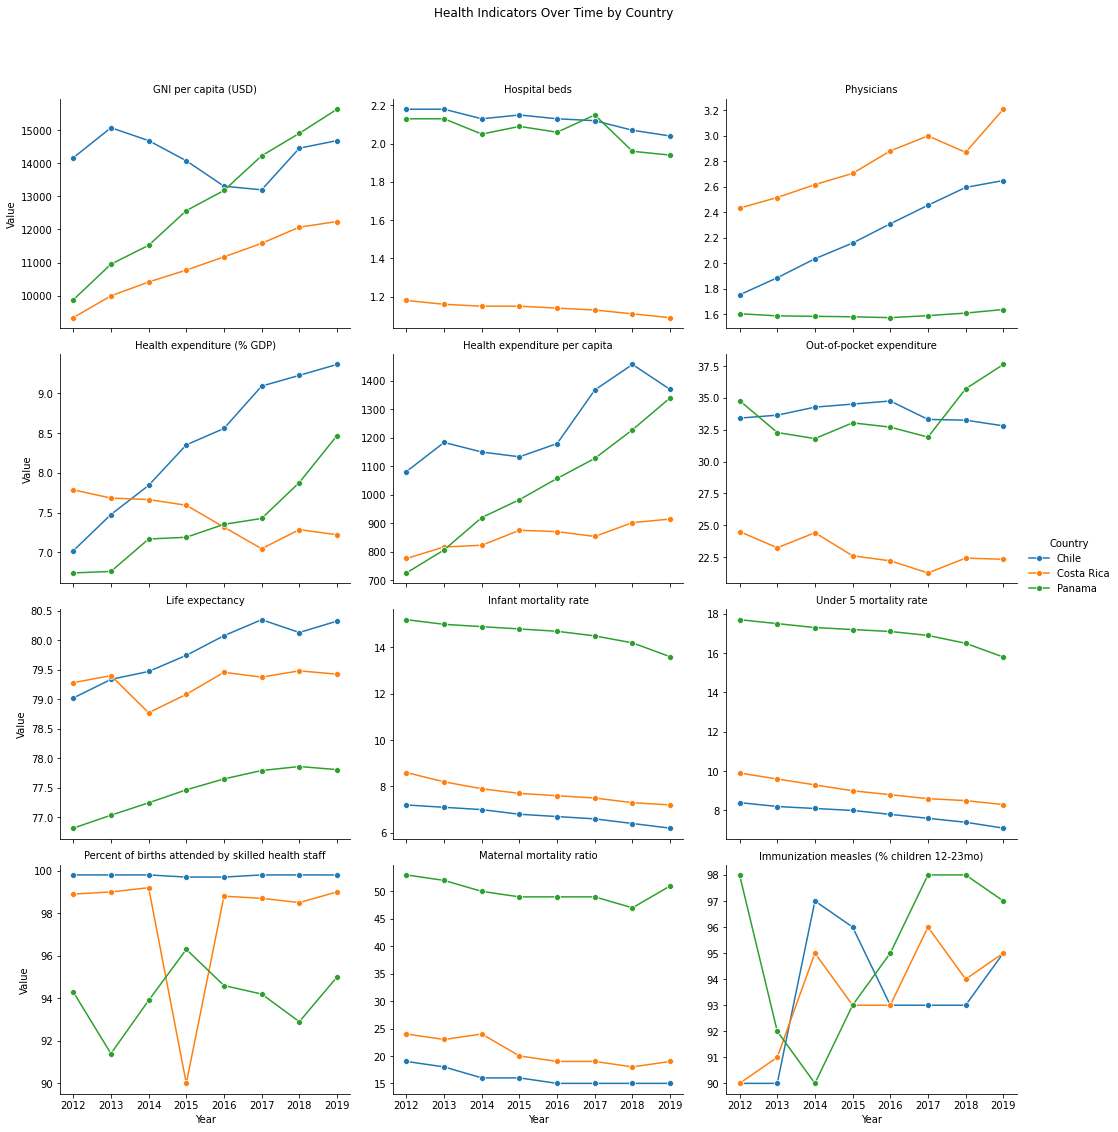

In [14]:
# Add a 'Country' column
chile_df['Country'] = 'Chile'
costarica_df['Country'] = 'Costa Rica'
panama_df['Country'] = 'Panama'

# Combine the dataframes
combined_df = pd.concat([chile_df, costarica_df, panama_df], ignore_index=True)

# Melt the dataframe to long format
id_vars = ['Year', 'Country']
value_vars = [col for col in combined_df.columns if col not in id_vars]
df_melted = pd.melt(combined_df, id_vars=id_vars, value_vars=value_vars, var_name='Metric', value_name='Value')

# Create the facet grid
g = sns.FacetGrid(df_melted, col="Metric", col_wrap=3, hue="Country", sharey=False, height=4, aspect=1.2)
g.map(sns.lineplot, "Year", "Value", marker="o")
g.set_titles("{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Health Indicators Over Time by Country')
plt.show()

**Some Takeaways:** 
* Chile seems to outperform Panama and Costa Rica on many significant aspects, such as health expenditure (both % GDP and per capita), hospital beds, infant mortality rate, under 5 mortality rate, life expectancy, % of births attended by health staff, and maternal mortality ratio.
* Panama is performing the poorest on most of these indicators.
* There does not seem to be a relationship between under 5 mortality rate and immunization rates.
* There does not seem to be a relationship between percent of births attended by skilled health staff and maternal mortality rate
* Strangely, in all three countries, hospital beds per 1000 patients is declining over time.

**Common Trends Among All Countries**
* Life expectancy is on an upwards trend
* Infant mortality rate is on a downwards trend
* Under 5 mortality rate is on a downwards trend
* Maternal mortality ratio is on a downwards trend
* GNI per capita is on an upwards trend
* Physicians per 1000 people is on an upwards trend
* Hospital beds per 1000 people is on a downwards trend
* Health expenditure per capita is on an upwards trend

I will explore these correlations in greater depth in the next section.

### Question 2: Growth Rates Overtime for Economic and Health Outcome Indicators


Growth rates for costarica_df:
GNI per capita (USD) growth rate from 2012 to 2019: 31.19%
Health expenditure (% GDP) growth rate from 2012 to 2019: -7.26%
Health expenditure per capita growth rate from 2012 to 2019: 17.83%

Growth rates for panama_df:
GNI per capita (USD) growth rate from 2012 to 2019: 58.46%
Health expenditure (% GDP) growth rate from 2012 to 2019: 25.61%
Health expenditure per capita growth rate from 2012 to 2019: 84.63%

Growth rates for chile_df:
GNI per capita (USD) growth rate from 2012 to 2019: 3.67%
Health expenditure (% GDP) growth rate from 2012 to 2019: 33.38%
Health expenditure per capita growth rate from 2012 to 2019: 26.63%


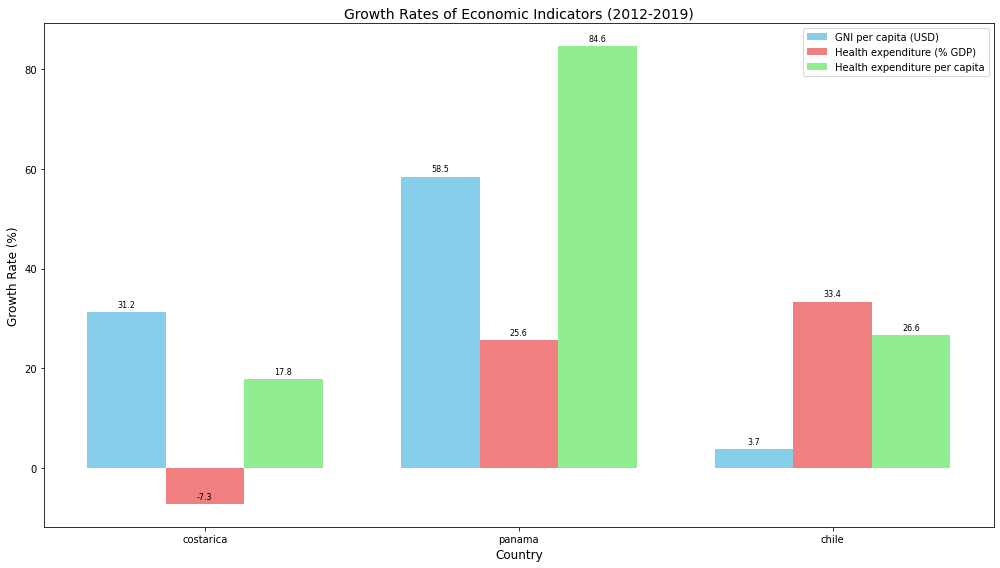


Growth rates for costarica_df:
Infant mortality rate growth rate from 2012 to 2019: -16.28%
Under 5 mortality rate growth rate from 2012 to 2019: -16.16%
Life expectancy growth rate from 2012 to 2019: 0.18%

Growth rates for panama_df:
Infant mortality rate growth rate from 2012 to 2019: -10.53%
Under 5 mortality rate growth rate from 2012 to 2019: -10.73%
Life expectancy growth rate from 2012 to 2019: 1.29%

Growth rates for chile_df:
Infant mortality rate growth rate from 2012 to 2019: -13.89%
Under 5 mortality rate growth rate from 2012 to 2019: -15.48%
Life expectancy growth rate from 2012 to 2019: 1.65%


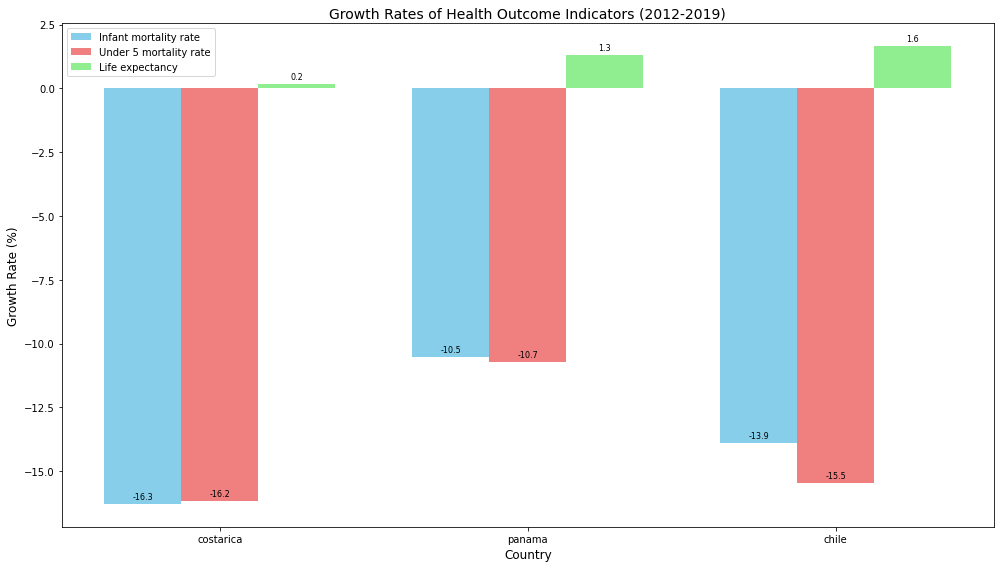

In [15]:
# Function to calculate growth rate
def calculate_growth_rate(df, column_name, start_year, end_year):
    start_value = df.loc[df['Year'] == start_year, column_name].values[0]
    end_value = df.loc[df['Year'] == end_year, column_name].values[0]
    growth_rate = ((end_value - start_value) / start_value) * 100
    return growth_rate

# Function to create and display growth rate visualization
def plot_growth_rates(dfs, columns, chart_title):
    # Years for comparison
    start_year = 2012
    end_year = 2019

    # Calculate and store growth rates for each country and column
    growth_rates = {}
    for df_name, df in dfs.items():
        print(f"\nGrowth rates for {df_name}:")
        growth_rates[df_name] = {}
        for column in columns:
            growth_rate = calculate_growth_rate(df, column, start_year, end_year)
            growth_rates[df_name][column] = growth_rate
            print(f"{column} growth rate from {start_year} to {end_year}: {growth_rate:.2f}%")

    # Prepare data for plotting
    country_names = list(dfs.keys())
    num_countries = len(country_names)
    num_columns = len(columns)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability

    # Bar width and positions
    bar_width = 0.25
    index = np.arange(num_countries)

    # Colors for the bars
    colors = ['skyblue', 'lightcoral', 'lightgreen']  # More visually distinct colors

    # Plot the bars
    for i, column in enumerate(columns):
        growth_values = [growth_rates[country][column] for country in country_names]
        ax.bar(index + i * bar_width, growth_values, bar_width, label=column, color=colors[i])

    # Add labels, title, and legend
    ax.set_xlabel('Country', fontsize=12)
    ax.set_ylabel('Growth Rate (%)', fontsize=12)
    ax.set_title(chart_title, fontsize=14)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels([name.replace("_df", "") for name in country_names], fontsize=10)
    ax.legend(fontsize=10)

    # Add data labels on bars
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    for i in range(num_columns):
        add_labels(ax.patches[i*num_countries: (i+1)*num_countries])

    # Improve layout
    fig.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---

# Dataframes
dfs = {
    "costarica_df": costarica_df,
    "panama_df": panama_df,
    "chile_df": chile_df,
}

# 1. Economic Indicators Visualization
economic_columns = ['GNI per capita (USD)', 'Health expenditure (% GDP)', 'Health expenditure per capita']
plot_growth_rates(dfs, economic_columns, "Growth Rates of Economic Indicators (2012-2019)")

# 2. Health Outcome Indicators Visualization
health_outcome_columns = ['Infant mortality rate', 'Under 5 mortality rate', 'Life expectancy']
plot_growth_rates(dfs, health_outcome_columns, "Growth Rates of Health Outcome Indicators (2012-2019)")

**Growth Rates of Economic Indicators** 

* These are important figures to look at. Although Question 1 showed us that Panama was performing worse than the other two countries for many indicators, we see here that for the most part, their growth rates are far stronger than any other country on the list. 


**Growth Rates of Health Outcome Indicators**

* All 3 countries are moving in a good direction. Their infant mortality and under 5 mortality rates are decreasing significantly, while their life expectancies are increasing.

### Question 3: Is there a correlation between economic indicators, health expenditure and health outcomes? 

### If so, what relationships are the strongest?

In this section, I will split the correlaitons into 3 categories: 

1. Economic Indicators vs. Health Outcomes
2. Economic Indicators vs. Healthcare Quality
3. Healthcare Quality vs. Health Outcomes

In [16]:
import pandas as pd

# Define the variable groups
economic_indicators = ['GNI per capita (USD)', 'Health expenditure (% GDP)', 'Health expenditure per capita', 'Out-of-pocket expenditure']
healthcare_quality = ['Hospital beds', 'Physicians', 'Percent of births attended by skilled health staff', 'Immunization measles (% children 12-23mo)']
health_outcomes = ['Life expectancy', 'Infant mortality rate',  'Under 5 mortality rate', 'Maternal mortality ratio']

# Function to calculate and print correlations for each category
def calculate_and_print_correlations(df, group1, group2, group1_name, group2_name):
    """Calculates and prints correlations between two groups of variables."""
    correlation_matrix = df[group1 + group2].corr().loc[group1, group2]
    print(f"Correlations: {group1_name} vs {group2_name}:\n{correlation_matrix}\n")

# 1. Economic Indicators vs. Health Outcomes
print("Chile Correlations")
calculate_and_print_correlations(chile_df, economic_indicators, health_outcomes, "Economic Indicators", "Health Outcomes")
print("Costa Rica Correlations")
calculate_and_print_correlations(costarica_df, economic_indicators, health_outcomes, "Economic Indicators", "Health Outcomes")
print("Panama Correlations")
calculate_and_print_correlations(panama_df, economic_indicators, health_outcomes, "Economic Indicators", "Health Outcomes")

# 2. Economic Indicators vs. Healthcare Quality
print("Chile Correlations")
calculate_and_print_correlations(chile_df, economic_indicators, healthcare_quality, "Economic Indicators", "Healthcare Quality")
print("Costa Rica Correlations")
calculate_and_print_correlations(costarica_df, economic_indicators, healthcare_quality, "Economic Indicators", "Healthcare Quality")
print("Panama Correlations")
calculate_and_print_correlations(panama_df, economic_indicators, healthcare_quality, "Economic Indicators", "Healthcare Quality")

# 3. Healthcare Quality vs. Health Outcomes
print("Chile Correlations")
calculate_and_print_correlations(chile_df, healthcare_quality, health_outcomes, "Healthcare Quality", "Health Outcomes")
print("Costa Rica Correlations")
calculate_and_print_correlations(costarica_df, healthcare_quality, health_outcomes, "Healthcare Quality", "Health Outcomes")
print("Panama Correlations")
calculate_and_print_correlations(panama_df, healthcare_quality, health_outcomes, "Healthcare Quality", "Health Outcomes")

Chile Correlations
Correlations: Economic Indicators vs Health Outcomes:
                               Life expectancy  Infant mortality rate  \
GNI per capita (USD)                 -0.430444               0.151125   
Health expenditure (% GDP)            0.976738              -0.967259   
Health expenditure per capita         0.800855              -0.848728   
Out-of-pocket expenditure            -0.221185               0.412457   

                               Under 5 mortality rate  \
GNI per capita (USD)                         0.101773   
Health expenditure (% GDP)                  -0.955177   
Health expenditure per capita               -0.880371   
Out-of-pocket expenditure                    0.481160   

                               Maternal mortality ratio  
GNI per capita (USD)                           0.385343  
Health expenditure (% GDP)                    -0.919451  
Health expenditure per capita                 -0.672722  
Out-of-pocket expenditure                  

#### To properly visualize these relationships, I have created a correlation heatmap below. 

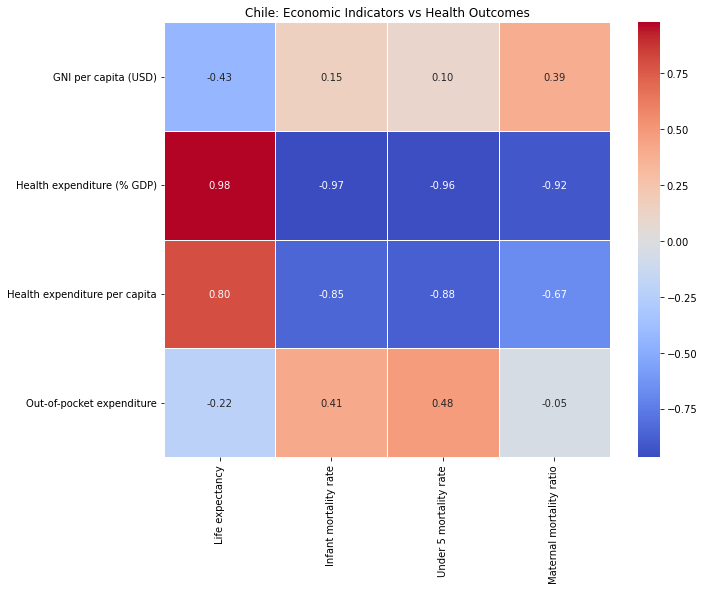

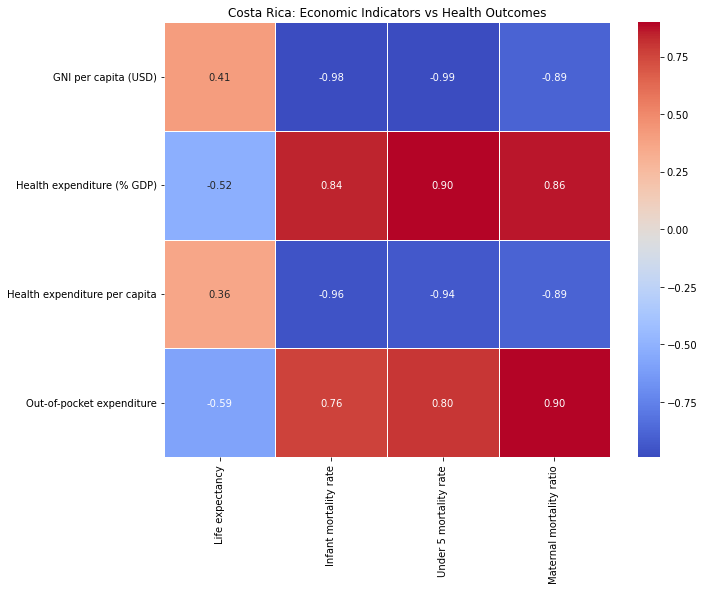

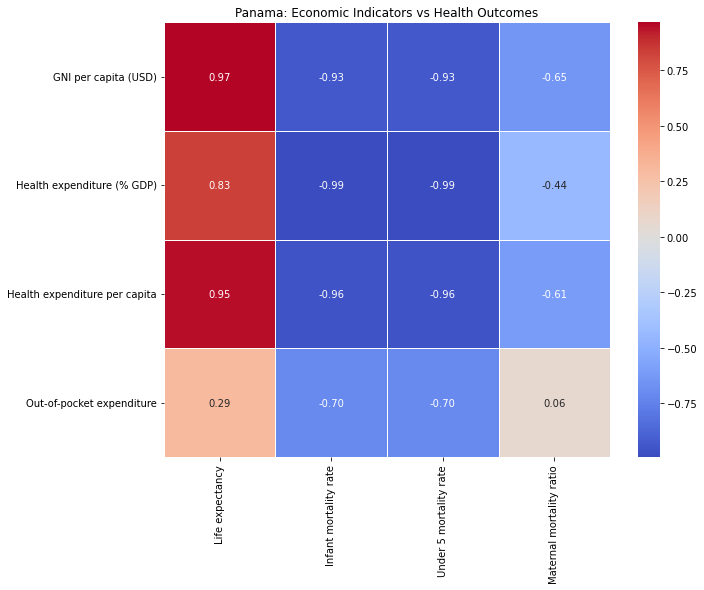

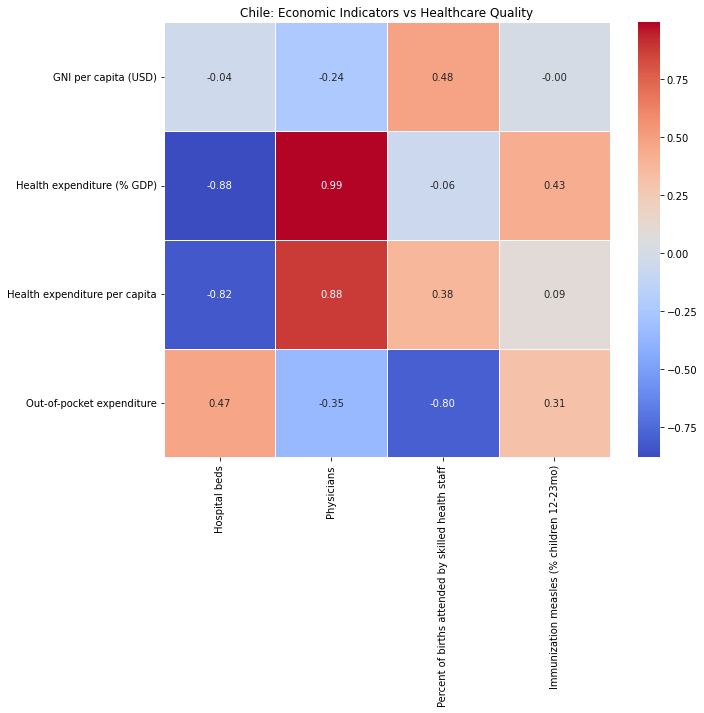

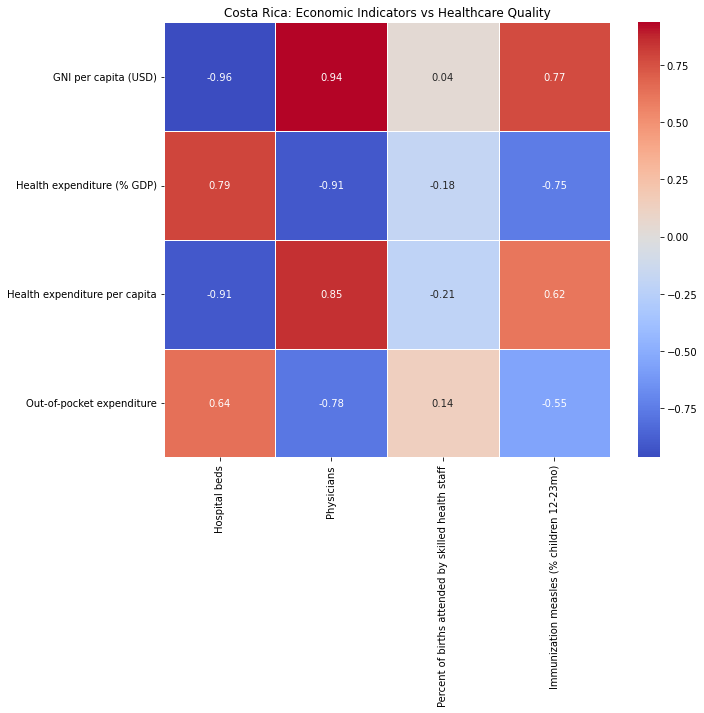

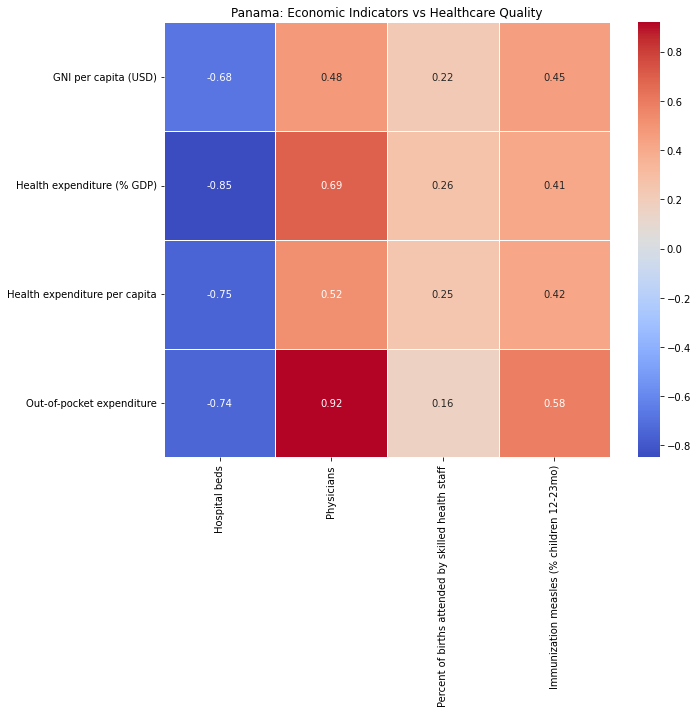

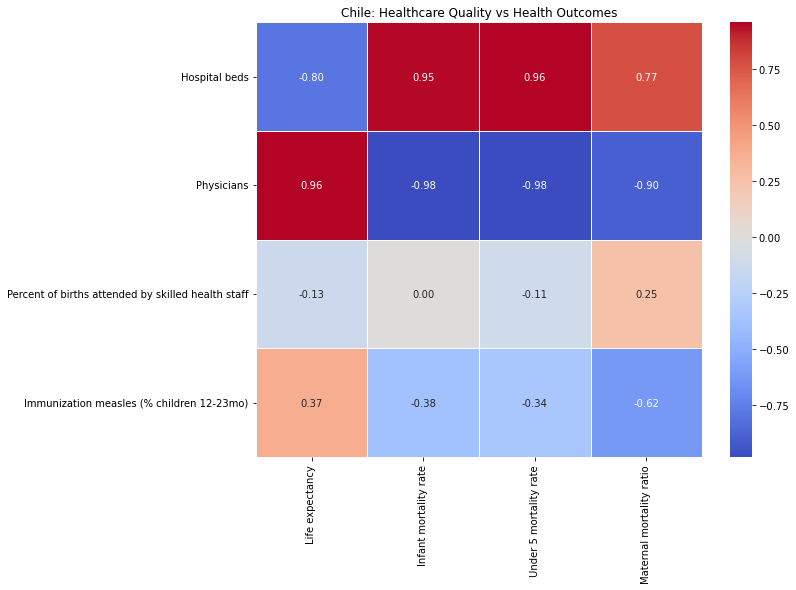

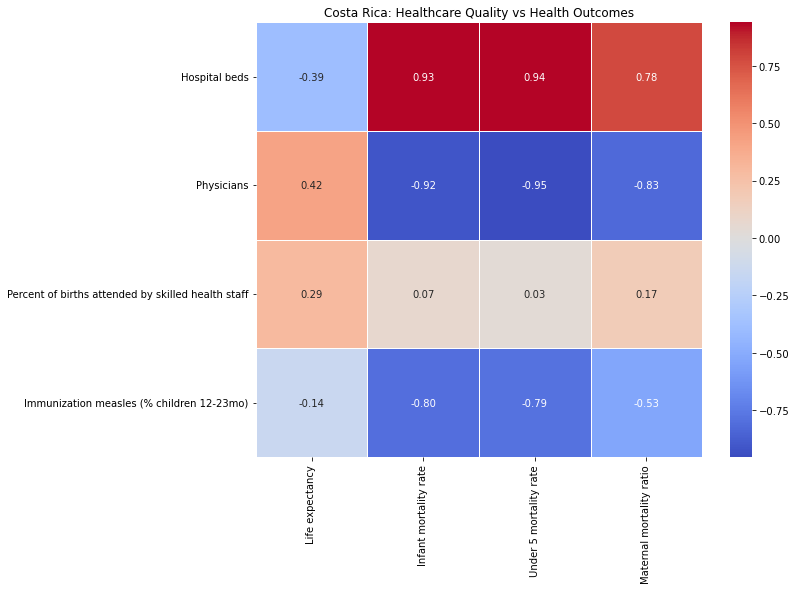

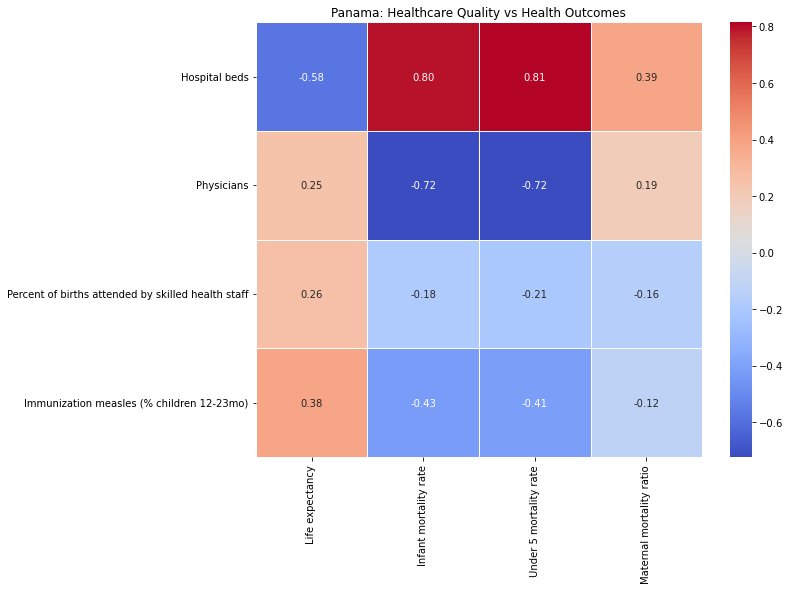

In [17]:
# Function to calculate and plot correlation heatmap
def plot_correlation_heatmap(df, group1, group2, title):
    """Calculates and plots a correlation heatmap between two groups of variables."""
    correlation_matrix = df[group1 + group2].corr().loc[group1, group2]

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

# 1. Economic Indicators vs. Health Outcomes
plot_correlation_heatmap(chile_df, economic_indicators, health_outcomes, "Chile: Economic Indicators vs Health Outcomes")
plot_correlation_heatmap(costarica_df, economic_indicators, health_outcomes, "Costa Rica: Economic Indicators vs Health Outcomes")
plot_correlation_heatmap(panama_df, economic_indicators, health_outcomes, "Panama: Economic Indicators vs Health Outcomes")

# 2. Economic Indicators vs. Healthcare Quality
plot_correlation_heatmap(chile_df, economic_indicators, healthcare_quality, "Chile: Economic Indicators vs Healthcare Quality")
plot_correlation_heatmap(costarica_df, economic_indicators, healthcare_quality, "Costa Rica: Economic Indicators vs Healthcare Quality")
plot_correlation_heatmap(panama_df, economic_indicators, healthcare_quality, "Panama: Economic Indicators vs Healthcare Quality")

# 3. Healthcare Quality vs. Health Outcomes
plot_correlation_heatmap(chile_df, healthcare_quality, health_outcomes, "Chile: Healthcare Quality vs Health Outcomes")
plot_correlation_heatmap(costarica_df, healthcare_quality, health_outcomes, "Costa Rica: Healthcare Quality vs Health Outcomes")
plot_correlation_heatmap(panama_df, healthcare_quality, health_outcomes, "Panama: Healthcare Quality vs Health Outcomes")

### Main Takeaways per Category

### Economic Indicators VS Health Outcomes

***Chile:***
* Very strong correlation between health expenditure (% GDP) and all 4 health outcomes
    * As health expenditure (% of GDP) increases, life expectancy increases.
    * As health expenditure (% of GDP) increases, infant mortality rate decreases. 
    * As health expenditure (% of GDP) increases, under 5 mortality rate decreases.
    * As health expenditure (% of GDP) increases, maternal mortality rate decreases.
    
    
* Strong correlation between health expenditure per capita and 3 health outcomes
    * As health expenditure per capita increases, life expectancy increases.
    * As health expenditure per capita increases, infant mortality rate decreases.  
    * As health expenditure per capita increases, under 5 mortality rate decreases.
    
    
***Costa Rica:***
* Strong correlation between health expenditure (% GDP) and 3 health outcomes
    * As health expenditure (% of GDP) increases, infant mortality rate increases. 
    * As health expenditure (% of GDP) increases, under 5 mortality rate increases.
    * As health expenditure (% of GDP) increases, maternal mortality rate increases.
    
    
This is not what you would typically expect, however, if you look back to question 1, you can see that health expenditure (% GDP) for Costa Rica is declining, while mortality rates are on a downward trend. This can be explained by many other factors, so by no means would I conclude that there is a negative correlation between health expenditure (% GDP) and health outcomes. A better measure to look at in this case might be the following: 


* Strong correlation between health expenditure per capita and 3 health outcomes
    * As health expenditure per capita increases, infant mortality rate decreases.  
    * As health expenditure per capita increases, under 5 mortality rate decreases.
    * As health expenditure per capita increases, maternal mortality rate decreases.
    
    
 ***Panama:***
 * Very strong correlation between GNI per capita and 3 health outcomes
    * As GNI per capita increases, life expectancy increases.
    * As GNI per capita increases, infant mortality rate decreases. 
    * As GNI per capita increases, under 5 mortality rate decreases. 
    
* Very strong correlation between health expenditure (% GDP) and 3 health outcomes
    * As health expenditure (% of GDP) increases, life expectancy increases.
    * As health expenditure (% of GDP) increases, infant mortality rate decreases. 
    * As health expenditure (% of GDP) increases, under 5 mortality rate decreases.
    
    
* Strong correlation between health expenditure per capita and 3 health outcomes
    * As health expenditure per capita increases, life expectancy increases.
    * As health expenditure per capita increases, infant mortality rate decreases.  
    * As health expenditure per capita increases, under 5 mortality rate decreases.

### Economic Indicators VS Healthcare Quality

For this section, I will not be including hospital beds in my analysis. This is because we saw above that all countries are facing a decline in hospital beds overtime. Looking at the correlation matrices for economic indicators VS healthcare quality, I can see that there is a strong negative relationship between hospital beds and health expenditures. I believe that hospital beds and healh expenditure are actually unrelatedand that the declining hospital beds are due to other factors, which is why I do not think it is relevant to this section.
 

***Chile:***
* Very strong positive correlation between health expenditure (% GDP) and physicians per 1000 people.

* Very strong positive correlation between health expenditure per capita and physicians per 1000 people.

***Costa Rica:***
* Very strong positive correlation between GNI per capita (USD) and physicians per 1000 people.

* Very strong positive correlation between health expenditure per capita and physicians per 1000 people.

* Very strong negative correlation between health expenditure (% GDP) and physicians per 1000 people.
    * We have already seen that % GDP might not be the greatest economic indicator for health outcomes and for healthcare quality! Health expenditure per capita seems to be the better metric.
 
***Panama:***
* Very strong positive correlation between out-of-pocket expenditure and physicians per 1000 people.

### Healthcare Quality VS Healthcare Outcomes

***Chile:***
* Very strong and strong correlation between physicians per 1000 people and all health outcomes.
    * As physicians per 1000 people increase, life expectancy increases.
    * As physicians per 1000 people increase, infant mortality decreases.
    * As physicians per 1000 people increase, under 5 mortality decreases.
    * As physicians per 1000 people increase, maternal mortality decreases.
    
***Costa Rica:***
* Very strong and strong correlation between physicians per 1000 people and 3 health outcomes.
    * As physicians per 1000 people increase, infant mortality decreases.
    * As physicians per 1000 people increase, under 5 mortality decreases.
    * As physicians per 1000 people increase, maternal mortality decreases.
  
* Strong correlation between immunization and 2 health outcomes
    * As immunization rates in infants increase, infant mortality decreases.
    * As immunization rates in infants increase, under 5 mortality decreases.
    
***Panama:***
* Strong correlation between physicians per 1000 people and 3 health outcomes.
    * As physicians per 1000 people increase, infant mortality decreases.
    * As physicians per 1000 people increase, under 5 mortality decreases.

### Concluding this Section

Judging from this analysis, I believe:

1. The most relevant economic indicator is health expenditure per capita
2. The most relevant healthcare quality indicator is physicians per 1000 people
3. The most affected healthcare outcome by these two indicators are infant mortality rates and under 5 mortality rates.

In [18]:
# Finalize dataframes

columns_to_keep = ['Year', 'Physicians', 'Health expenditure per capita', 'Infant mortality rate', 'Under 5 mortality rate']

costarica_df_final = costarica_df[columns_to_keep]

costarica_df_final

,Year,Physicians,Health expenditure per capita,Infant mortality rate,Under 5 mortality rate
0,2012,2.433,776.434875,8.6,9.9
1,2013,2.516,816.878723,8.2,9.6
2,2014,2.617,822.910034,7.9,9.3
3,2015,2.705,875.349731,7.7,9.0
4,2016,2.881,870.738403,7.6,8.8
5,2017,2.999,853.750488,7.5,8.6
6,2018,2.870,902.221191,7.3,8.5
7,2019,3.208,914.884705,7.2,8.3


In [19]:
chile_df_final = chile_df[columns_to_keep]

chile_df_final

,Year,Physicians,Health expenditure per capita,Infant mortality rate,Under 5 mortality rate
0,2012,1.753,1081.460693,7.2,8.4
1,2013,1.887,1183.620850,7.1,8.2
2,2014,2.036,1150.061646,7.0,8.1
3,2015,2.159,1133.279785,6.8,8.0
4,2016,2.310,1179.733643,6.7,7.8
5,2017,2.455,1367.716431,6.6,7.6
6,2018,2.595,1457.272827,6.4,7.4
7,2019,2.649,1369.484009,6.2,7.1


In [20]:
panama_df_final = panama_df[columns_to_keep]

panama_df_final

,Year,Physicians,Health expenditure per capita,Infant mortality rate,Under 5 mortality rate
0,2012,1.6050,725.863770,15.2,17.7
1,2013,1.5880,806.585510,15.0,17.5
2,2014,1.5845,920.076599,14.9,17.3
3,2015,1.5810,982.793945,14.8,17.2
4,2016,1.5740,1057.406616,14.7,17.1
5,2017,1.5900,1127.688965,14.5,16.9
6,2018,1.6100,1228.073364,14.2,16.5
7,2019,1.6380,1340.137817,13.6,15.8


### Question 4: Can we predict future health indicators based on historical data?

### Infant Mortality Rate

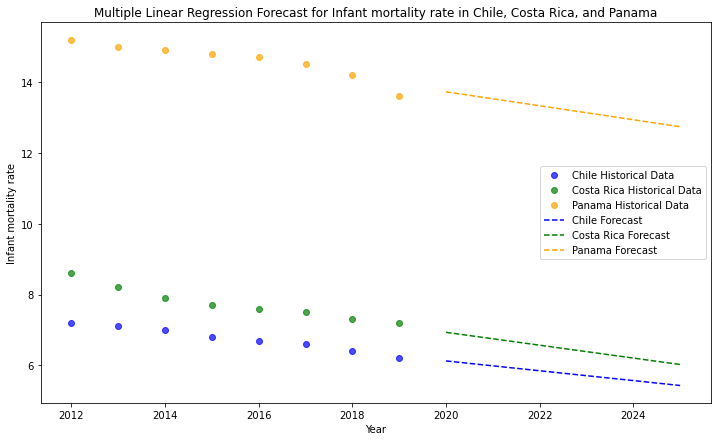


Forecast Table:
Country     Chile  Costa Rica     Panama
Year                                    
2020     6.125276    6.932504  13.725187
2021     5.986449    6.750838  13.528006
2022     5.847621    6.569172  13.330825
2023     5.708793    6.387506  13.133645
2024     5.569966    6.205841  12.936464
2025     5.431138    6.024175  12.739283


In [21]:
from sklearn.linear_model import LinearRegression

# Define the columns to use as predictors and target
predictors = ['Health expenditure per capita', 'Physicians']
target = 'Infant mortality rate'

def forecast_multiple_linear_regression(df, predictors, target, years_to_forecast=6):
    """
    Forecasts a given health indicator using multiple linear regression.

    Parameters:
    df (pd.DataFrame): DataFrame containing historical data.
    predictors (list): A list of column names to use as predictors.
    target (str): The column name of the indicator to forecast.
    years_to_forecast (int): Number of years into the future to forecast.

    Returns:
    tuple: A tuple containing the model and a DataFrame with the forecasted values.
    """

    # Prepare the data
    X = df[predictors].values
    y = df[target].values

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Create future year values
    last_year = df['Year'].max()
    future_years = np.arange(last_year + 1, last_year + years_to_forecast + 1)

    # Extrapolate predictor values (using simple linear extrapolation)
    future_X = []
    for predictor in predictors:
        # Fit a simple linear regression to the predictor
        x = df['Year'].values.reshape(-1, 1)
        y_predictor = df[predictor].values
        predictor_model = LinearRegression()
        predictor_model.fit(x, y_predictor)

        # Predict future values of the predictor
        future_predictor_values = predictor_model.predict(future_years.reshape(-1, 1))
        future_X.append(future_predictor_values)

    # Combine extrapolated predictors into a single array
    future_X = np.column_stack(future_X)

    # Generate forecasts
    forecasted_values = model.predict(future_X)

    # Create a DataFrame for the forecasted values
    forecast_df = pd.DataFrame({'Year': future_years.flatten(), 'Forecast': forecasted_values})

    return model, forecast_df

def plot_combined_forecasts(chile_df, costarica_df, panama_df, forecast_df_chile, forecast_df_costarica, forecast_df_panama, target):
    """Plots historical data and forecasted values for all three countries on the same plot."""
    plt.figure(figsize=(12, 7))

    # Plot historical data
    plt.scatter(chile_df['Year'], chile_df[target], label='Chile Historical Data', color='blue', alpha=0.7)
    plt.scatter(costarica_df['Year'], costarica_df[target], label='Costa Rica Historical Data', color='green', alpha=0.7)
    plt.scatter(panama_df['Year'], panama_df[target], label='Panama Historical Data', color='orange', alpha=0.7)

    # Plot forecast data
    plt.plot(forecast_df_chile['Year'], forecast_df_chile['Forecast'], label='Chile Forecast', color='blue', linestyle='--')
    plt.plot(forecast_df_costarica['Year'], forecast_df_costarica['Forecast'], label='Costa Rica Forecast', color='green', linestyle='--')
    plt.plot(forecast_df_panama['Year'], forecast_df_panama['Forecast'], label='Panama Forecast', color='orange', linestyle='--')

    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title(f'Multiple Linear Regression Forecast for {target} in Chile, Costa Rica, and Panama')
    plt.legend()
    plt.show()

# Example usage:
years_to_forecast = 6 # Forecast to 2025

# Chile forecast
model_chile, forecast_df_chile = forecast_multiple_linear_regression(chile_df, predictors, target, years_to_forecast)

# Costa Rica forecast
model_costarica, forecast_df_costarica = forecast_multiple_linear_regression(costarica_df, predictors, target, years_to_forecast)

# Panama forecast
model_panama, forecast_df_panama = forecast_multiple_linear_regression(panama_df, predictors, target, years_to_forecast)

# Plot combined forecast
plot_combined_forecasts(chile_df, costarica_df, panama_df, forecast_df_chile, forecast_df_costarica, forecast_df_panama, target)

# Combine the forecast dataframes into a single table:
forecast_df_chile['Country'] = 'Chile'
forecast_df_costarica['Country'] = 'Costa Rica'
forecast_df_panama['Country'] = 'Panama'
forecast_table = pd.concat([forecast_df_chile, forecast_df_costarica, forecast_df_panama])
forecast_table = forecast_table.pivot_table(index='Year', columns='Country', values='Forecast')
print("\nForecast Table:")
print(forecast_table)

#### Compare Actual vs Predicted

According to the data I acquired here: https://databank.worldbank.org/source/health-nutrition-and-population-statistics, these are the actual values for infant mortality rates between 2020-2022 (This is the latest data):

**Panama:**

* 2020: 12.9 
* 2021: 12.2 
* 2022: 11.4 

**Chile:** 

* 2020: 5.9 
* 2021: 5.7 
* 2022: 5.4

**Costa Rica:** 

* 2020: 7.0 
* 2021: 6.9 
* 2022: 6.9

#### Calculate MSE

In [22]:
panama_actuals = [12.9, 12.2, 11.4]
panama_predictions = [13.725187, 13.528006, 13.330825]

chile_actuals = [5.9, 5.7, 5.4]
chile_predictions = [6.125276, 5.986449, 5.847621]

costarica_actuals = [7.0, 6.9, 6.9]
costarica_predictions = [6.932504, 6.750838, 6.569172]


def mean_squared_error(actuals, predictions):
    actuals, predictions = np.array(actuals), np.array(predictions)
    return np.square(np.subtract(actuals, predictions)).mean()


print('Chile MSE:', mean_squared_error(chile_actuals, chile_predictions))
print('Costa Rica MSE:', mean_squared_error(costarica_actuals, costarica_predictions))
print('Panama MSE:', mean_squared_error(panama_actuals, panama_predictions))

Chile MSE: 0.11105562180599998
Costa Rica MSE: 0.0454173926146668
Panama MSE: 2.0575395672100005


### Under 5 Mortality Rate

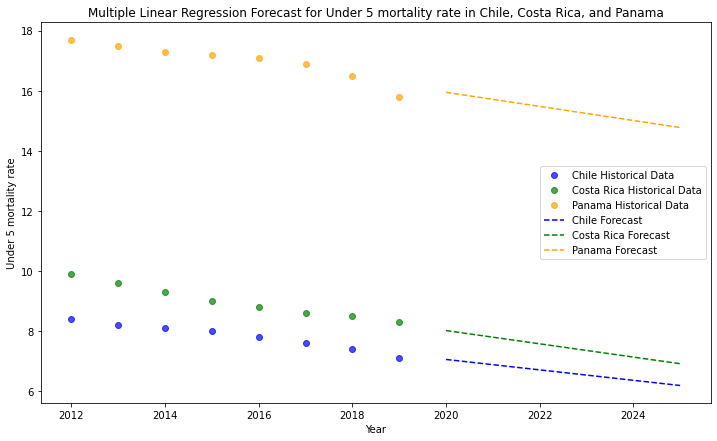


Forecast Table:
Country     Chile  Costa Rica     Panama
Year                                    
2020     7.043962    8.006431  15.943463
2021     6.870398    7.785638  15.708677
2022     6.696834    7.564845  15.473891
2023     6.523270    7.344051  15.239105
2024     6.349706    7.123258  15.004319
2025     6.176142    6.902465  14.769533


In [23]:
# Define the columns to use as predictors and target
target = 'Under 5 mortality rate'


# Chile forecast
model_chile, forecast_df_chile = forecast_multiple_linear_regression(chile_df, predictors, target, years_to_forecast)

# Costa Rica forecast
model_costarica, forecast_df_costarica = forecast_multiple_linear_regression(costarica_df, predictors, target, years_to_forecast)

# Panama forecast
model_panama, forecast_df_panama = forecast_multiple_linear_regression(panama_df, predictors, target, years_to_forecast)

# Plot combined forecast
plot_combined_forecasts(chile_df, costarica_df, panama_df, forecast_df_chile, forecast_df_costarica, forecast_df_panama, target)

# Combine the forecast dataframes into a single table:
forecast_df_chile['Country'] = 'Chile'
forecast_df_costarica['Country'] = 'Costa Rica'
forecast_df_panama['Country'] = 'Panama'
forecast_table = pd.concat([forecast_df_chile, forecast_df_costarica, forecast_df_panama])
forecast_table = forecast_table.pivot_table(index='Year', columns='Country', values='Forecast')
print("\nForecast Table:")
print(forecast_table)

#### Compare Actual vs Predicted

According to the data I acquired here: https://databank.worldbank.org/source/health-nutrition-and-population-statistics, these are the actual values for under 5 mortality rates between 2020-2022 (This is the latest data):

**Panama:**

* 2020: 15.0 
* 2021: 14.1 
* 2022: 13.3 

**Chile:** 

* 2020: 6.9 
* 2021: 6.6 
* 2022: 6.3

**Costa Rica:**

* 2020: 8.1 
* 2021: 7.9 
* 2022: 7.7

In [24]:
panama_actuals1 = [15.0, 14.1, 13.3]
panama_predictions1 = [15.943463, 15.708677, 15.473891]

chile_actuals1 = [6.9, 6.6, 6.3]  
chile_predictions1 = [7.043962, 6.870398, 6.696834]

costarica_actuals1 = [8.1, 7.9, 7.7]
costarica_predictions1 = [8.006431, 7.785638, 7.564845]


print('Chile MSE:', mean_squared_error(chile_actuals1, chile_predictions1))
print('Costa Rica MSE:', mean_squared_error(costarica_actuals1, costarica_predictions1))
print('Panama MSE:', mean_squared_error(panama_actuals1, panama_predictions1))

Chile MSE: 0.08377245313466665
Costa Rica MSE: 0.013366899610000099
Panama MSE: 2.734588734192999


We can see that our MSE for both health outcomes for Panama is not good. Panama ended up performing much better than our multiple linear regression model predicted, while our predictions for Costa Rica were particularly good.

If we reflect back to Question 2, where we looked at growth rates, Panama's growth rates for GNI per capita, Health expenditure per capita and Health expenditure (% GDP) were extremely high. This could explain why our model is underestimating Panama's potential for improved health outcomes.

<a id='conclusions'></a>
## Conclusion

This analysis highlights significant disparities in health indicators across Chile, Costa Rica, and Panama, reflecting differing economic development levels and healthcare system priorities.

* Chile's Strong Performance: Chile consistently demonstrates superior health outcomes, correlated with its higher GNI per capita and greater investment in its health system, in terms of percentages of GDP. Chile is ahead of the curve with key outcomes.

* Costa Rica's Health Efficiency: Costa Rica achieves relatively good health outcomes despite having the lowest GNI per capita and health expenditure per capita among the three nations. This suggests Costa Rica has efficient healthcare.

* Challenges for Panama: Panama exhibits the highest infant and under-5 mortality rates, which is not good. This is something that it should prioritize moving forward. Nonetheless, their growth rates are very impressive and indicates that they are moving in the right direction.

Further Analysis:
* It would be beneficial to delve deeper into other factors, such as capital health expenditure, cause-specific mortality rates or prevalence of major diseases, and water/sanitation quality to investigate the factors that influence public health more, for these three countries, moving forward.